In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
import os
import pickle
warnings.filterwarnings('ignore')

In [2]:
df_engine_health_data = pd.read_csv('datasets\\Vehicle_Engine_Health\\engine_data.csv')
df_battery_RUL = pd.read_csv("datasets\\RUL_battery\\Battery_RUL.csv")

In [3]:
df_engine_health_data.head(5)
df_engine_health_data['Engine_Condition_Categorical'] = df_engine_health_data['Engine Condition']
df_engine_health_data['Engine_Condition_Categorical'] = df_engine_health_data['Engine_Condition_Categorical'].replace(0,'bad')
df_engine_health_data['Engine_Condition_Categorical'] = df_engine_health_data['Engine_Condition_Categorical'].replace(1,'good')

In [4]:
df_engine_health_data.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition',
       'Engine_Condition_Categorical'],
      dtype='object')

In [5]:
df_engine_health_data.head(5)
df_engine_health_data.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [6]:
df_engine_health_data['Engine Condition'].value_counts()

1    12317
0     7218
Name: Engine Condition, dtype: int64

In [7]:
df_battery_RUL.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

In [8]:
df_battery_RUL.head(5)

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [9]:
df_engine_health_data.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition',
       'Engine_Condition_Categorical'],
      dtype='object')

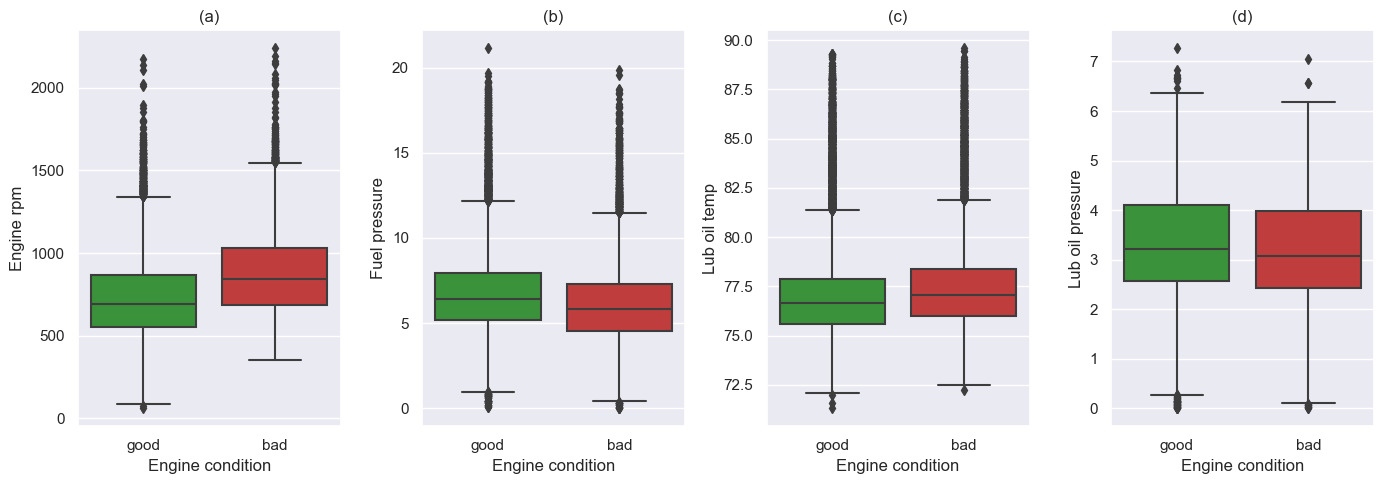

In [10]:
# make column name consistant
engine_dataset_columns_names = {
    'lub oil temp': 'Lub oil temp',
    'Engine Condition': 'Engine condition'
}

# box plots

palette = {'good':'tab:green', 'bad':'tab:red'}

engine_health_data = df_engine_health_data.drop("Engine Condition",axis=1)
engine_health_data.rename(columns= {'Engine_Condition_Categorical':'Engine Condition'},inplace=True)

engine_health_data.rename(columns = engine_dataset_columns_names, inplace=True) 

plt.figure(figsize=(14, 5))  # Set the figure size if needed

plt.subplot(1, 4, 1)  # Create the first subplot for 'Value1'
sns.boxplot(data=engine_health_data, x="Engine condition", y="Engine rpm",palette=palette)
plt.title("(a)")

plt.subplot(1, 4, 2)  # Create the second subplot for 'Value2'
sns.boxplot(data=engine_health_data, x="Engine condition", y="Fuel pressure",palette=palette)
plt.title("(b)")

plt.subplot(1, 4, 3)  # Create the second subplot for 'Value2'
sns.boxplot(data=engine_health_data, x="Engine condition", y="Lub oil temp",palette=palette)
plt.title("(c)")

plt.subplot(1, 4, 4)  # Create the second subplot for 'Value2'
sns.boxplot(data=engine_health_data, x="Engine condition", y="Lub oil pressure",palette=palette)
plt.title("(d)")

plt.tight_layout()  # Ensure proper spacing between subplots

plt.savefig('figures/engine_condition_boxplot.png')


plt.show()



In [11]:
df_battery_RUL_for_figure = df_battery_RUL.copy()


columns_to_remove = ['Decrement 3.6-3.4V (s)','Time at 4.15V (s)']
df_battery_RUL_for_figure = df_battery_RUL_for_figure.drop(columns=columns_to_remove)
df_battery_RUL_for_figure = df_battery_RUL_for_figure.rename(columns={'Cycle_Index': 'Cycle Index', 'Discharge Time (s)': 'Discharging Time', 'Charging time (s)':'Charging Time', 'RUL':'RUL','Time constant current (s)': 'Charging Current','Min. Voltage Charg. (V)':'Under Voltage','Max. Voltage Dischar. (V)':'Over Voltage'})
print(df_battery_RUL_for_figure.columns)

Index(['Cycle Index', 'Discharging Time', 'Over Voltage', 'Under Voltage',
       'Charging Current', 'Charging Time', 'RUL'],
      dtype='object')


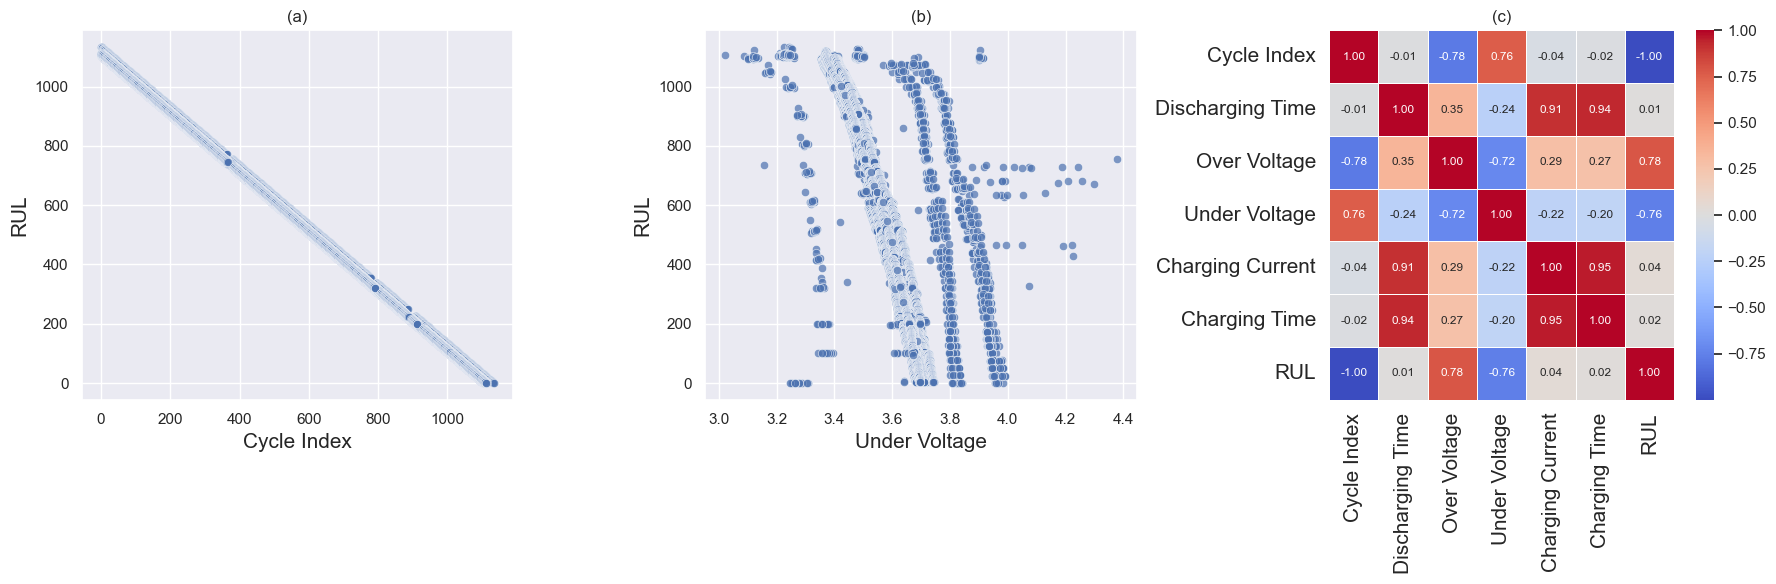

In [14]:
plt.figure(figsize=(18, 6))  # Set the figure size if needed

plt.subplot(1, 3, 1)  # Create the first subplot for 'Value1'
sns.scatterplot(data=df_battery_RUL_for_figure, x="Cycle Index", y="RUL",alpha=0.7)
plt.title("(a)")
plt.xlabel("Cycle Index", fontsize=15)  # Change the font size as needed
plt.ylabel("RUL", fontsize=15)

plt.subplot(1, 3, 2)  # Create the second subplot for 'Value2'
sns.scatterplot(data=df_battery_RUL_for_figure, x="Under Voltage", y="RUL",alpha=0.7)
plt.title("(b)")
plt.xlabel("Under Voltage", fontsize=15)  # Change the font size as needed
plt.ylabel("RUL", fontsize=15)
# plt.subplot(1, 3, 3)  # Create the second subplot for 'Value2'
# sns.scatterplot(data=df_battery_RUL, x="Max. Voltage Dischar. (V)", y="RUL",alpha=0.7)
# plt.title("(c)")

correlation_matrix = df_battery_RUL_for_figure.corr()


plt.subplot(1, 3, 3)  # Create the second subplot for 'Value2'
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size":8.5})
plt.xticks(fontsize=15)  # Adjust the font size for the x-axis column names
plt.yticks(fontsize=15)
#sns.scatterplot(data=df_battery_RUL, x="Charging time (s)", y="RUL",alpha=0.7)

plt.title("(c)")

plt.tight_layout()  # Ensure proper spacing between subplots

plt.savefig('figures/battery_RUL_plots.png',dpi=800)

plt.show()


In [159]:
# splitting engine health data into traiing set (80%) and test-set (20%)

# engine health dataset, Engine Condition is the target variable
X_engine_health = df_engine_health_data.drop(columns=['Engine Condition','Engine_Condition_Categorical'])
y_engine_health = df_engine_health_data['Engine Condition']

X_train_engine_health, X_test_engine_health, y_train_engine_health, y_test_engine_health = train_test_split(X_engine_health, y_engine_health, test_size=0.2, random_state=42)

In [160]:
#checking that everything is correct
X_train_engine_health.shape, X_test_engine_health.shape, y_train_engine_health.shape, y_test_engine_health.shape

((15628, 6), (3907, 6), (15628,), (3907,))

In [161]:
# splitting battery RUL dataset into traiing set (80%) and test-set (20%)

# engine health dataset, Engine Condition is the target variable
X_battery_RUL = df_battery_RUL.drop(columns=['RUL'])
y_battery_RUL = df_battery_RUL['RUL']

X_train_battery_RUL, X_test_battery_RUL, y_train_battery_RUL, y_test_battery_RUL = train_test_split(X_battery_RUL, y_battery_RUL, test_size=0.2, random_state=42)
#checking that everything is correct
print(X_train_battery_RUL.shape, X_test_battery_RUL.shape, y_train_battery_RUL.shape, y_test_battery_RUL.shape)

(12051, 8) (3013, 8) (12051,) (3013,)


In [162]:
# training and validating multiple models (logistic regression, random forest, decision tree, xgboost, and neural network)
# for predicting engine health condition (binary classification) -  0 for bad, 1 for good.
# using 5 cross validation, and finding their best hyperparameters using grid search

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold



models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {'C': [0.1, 1,5, 10,50,100,500], 'solver': ['liblinear','lbfgs']}
     },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [300], 'max_depth': [5]}
     }
   ,
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [None, 5, 10,15,20,25]}
     }
        ,
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 5,10,15,20,25,30]}
    },
    'Neural Network': {
        'model': MLPClassifier(),
        'params': {'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)], 'alpha': [0.0001, 0.001, 0.01]}
    }
}

if os.path.exists("saved_models/engine_health_prediction_RF_model.pkl")==False:

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Dictionary to store the best models and their hyperparameters
    best_models_classification = {}
    
    # Loop through each model and perform grid search
    for model_name, model_info in models.items():
        grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=kf, scoring='f1', verbose=1)
        grid_search.fit(X_train_engine_health, y_train_engine_health)
        
        best_model = grid_search.best_estimator_
        best_hyperparameters = grid_search.best_params_
        
        best_models_classification[model_name] = {
            'model': best_model,
            'best_params': best_hyperparameters
        }
        
        
    print(best_models_classification)
    
    
    # Evaluate model performance with best hyperparameters using 5-fold cross-validation
    performance_metrics = {
        'Accuracy': 'accuracy',
       'Precision': 'precision',
        'Recall': 'recall',
        'F1 Score': 'f1'
    }
    
    for metric_name, scoring_metric in performance_metrics.items():
        print(f'--- {metric_name} ---')
        for model_name, model_info in best_models_classification.items():
            scores = cross_val_score(model_info['model'], X_train_engine_health, y_train_engine_health, cv=kf, scoring=scoring_metric)
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            print(f'{model_name}: Mean {metric_name}={mean_score:.4f}, Std {metric_name}={std_score:.4f}')

    model_filename = 'engine_health_prediction_RF_model.pkl'
    with open("saved_models/"+ "engine_health_prediction_RF_model.pkl", 'wb') as file:
        pickle.dump(best_models_classification["Random Forest"]["model"], file)
    
    print("The best model for engine health prediction has been saved sucessfully!")
else:
    print("The model for engine health prediction is already exist")

The model for engine health prediction is already exist


In [163]:
# Battery RUL

# training and validating multiple models (logistic regression, random forest, decision tree, xgboost, and neural network)
# for predicting Battery Remaining Useful Life (RUL).

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor 
from xgboost import XGBRegressor

models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
     },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300,400,500], 'max_depth': [None, 5,10,15,20,25,30]}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [None, 5, 10,15,20,25]}
     }
        ,
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {'n_estimators': [500], 'max_depth': [10]}
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 5,10,15,20,25,30]}
    }
    ,
    'Neural Network': {
        'model': MLPRegressor(),
        'params': {'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16)], 'activation': ['relu', 'tanh']}
    }
}

#print(X_train_battery_RUL.shape, X_test_battery_RUL.shape, y_train_battery_RUL.shape, y_test_battery_RUL.shape)

if os.path.exists("saved_models/RUL_battery_prediction_XGBoost_model.pkl")==False:


    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Dictionary to store the best models and their hyperparameters
    best_models_regression = {}
    
    # Loop through each model and perform grid search
    for model_name, model_info in models.items():
        grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=kf, scoring='neg_mean_squared_error', verbose=1)
        grid_search.fit(X_train_battery_RUL, y_train_battery_RUL)
        
        best_model = grid_search.best_estimator_
        best_hyperparameters = grid_search.best_params_
        
        best_models_regression[model_name] = {
            'model': best_model,
            'best_params': best_hyperparameters
        }
    
    
    for model_name, model_info in best_models_regression.items():
        cv_scores = cross_val_score(model_info['model'], X_train_battery_RUL, y_train_battery_RUL, cv=kf, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-cv_scores)    
        print(f"{model_name}: Mean RMSE = {rmse_scores.mean()}, Std Dev = {rmse_scores.std()}")
    
    # save RUL battery prediction model
    with open("saved_models/" + "RUL_battery_prediction_XGBoost_model.pkl", 'wb') as file:
        pickle.dump(best_models_regression["XGBoost"]["model"], file)
    print("The best model for RUL battery prediction has been saved sucessfully!")
else:
    print("The model for RUL battery prediction is already exist")

The model for RUL battery prediction is already exist


In [164]:
# loading engine health model
with open("saved_models/" + "engine_health_prediction_RF_model.pkl", 'rb') as file:
    engine_health_model = pickle.load( file)

# load RUL battery predidction model
with open("saved_models/" + "RUL_battery_prediction_XGBoost_model.pkl", 'rb') as file:
    rul_battery_model = pickle.load( file)

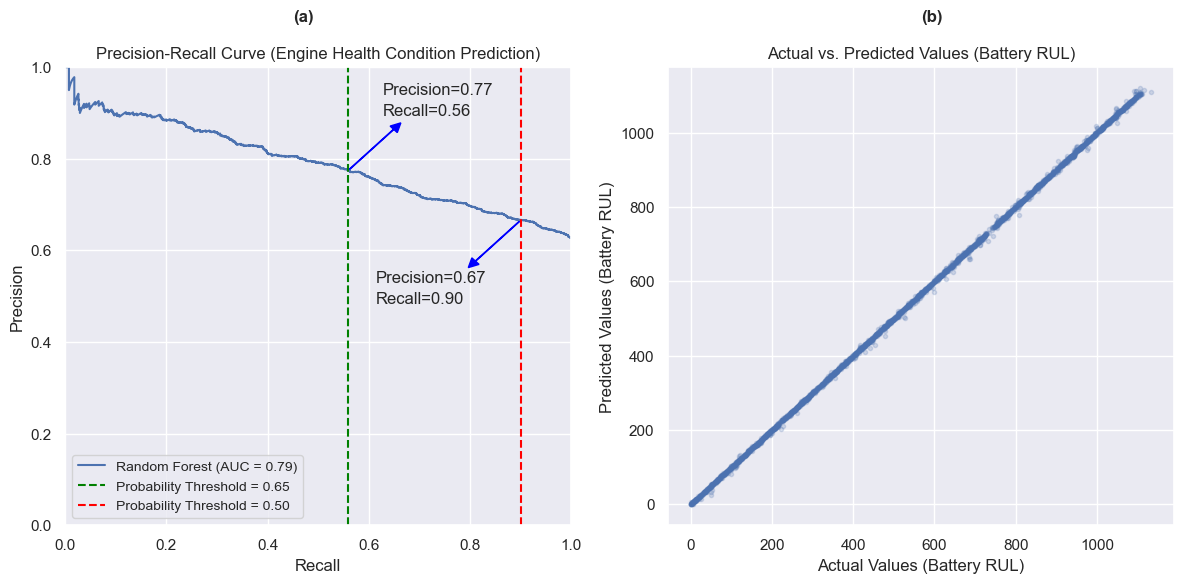

In [165]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
from sklearn.metrics import average_precision_score

#X_test_battery_RUL, y_test_battery_RUL
y_pred = rul_battery_model.predict(X_test_battery_RUL)
y_pred_prob = engine_health_model.predict_proba(X_test_engine_health)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test_engine_health, y_pred_prob)
threshold_index_1 = np.argmin(np.abs(thresholds - 0.65))
threshold_index_2 = np.argmin(np.abs(thresholds - 0.50))


average_precision = average_precision_score(y_test_engine_health, y_pred_prob)
pr_auc = auc(recall, precision)
ax1.plot(recall, precision, label=f'{"Random Forest"} (AUC = {pr_auc:.2f})')
ax1.axvline(recall[threshold_index_1], color='green', linestyle='--', label='Probability Threshold = 0.65')
ax1.axvline(recall[threshold_index_2], color='red', linestyle='--', label='Probability Threshold = 0.50')
intersection_recall_1 = recall[threshold_index_1]
intersection_precision_1 = precision[threshold_index_1]

intersection_recall_2 = recall[threshold_index_2]
intersection_precision_2 = precision[threshold_index_2]
#plt.arrow(intersection_recall, intersection_precision, 0, 0.1, head_width=0.02, head_length=0.02, fc='blue', ec='blue')
ax1.annotate(f'Precision={intersection_precision_1:.2f}', (intersection_recall_1, intersection_precision_1), textcoords="offset points", xytext=(65, 55), ha='center')
ax1.annotate(f'Recall={intersection_recall_1:.2f}', (intersection_recall_1, intersection_precision_1), textcoords="offset points", xytext=(56.5, 40), ha='center')
ax1.arrow(intersection_recall_1, intersection_precision_1, 0.09, 0.09, head_width=0.02, head_length=0.02, fc='blue', ec='blue')

ax1.annotate(f'Precision={intersection_precision_2:.2f}', (intersection_recall_2, intersection_precision_2), textcoords="offset points", xytext=(-65, -45), ha='center')
ax1.annotate(f'Recall={intersection_recall_2:.2f}', (intersection_recall_2, intersection_precision_2), textcoords="offset points", xytext=(-72.6, -60), ha='center')
ax1.arrow(intersection_recall_2, intersection_precision_2, -0.09, -0.09, head_width=0.02, head_length=0.02, fc='blue', ec='blue')

ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve (Engine Health Condition Prediction)')
ax1.legend(loc='lower left', fontsize="10")
#plt.show()

# Add '(b)' label to the second subplot
ax1.text(0.45, 1.10, '(a)', transform=ax1.transAxes, fontsize=12, fontweight='bold')
y_pred = [int(value) for value in y_pred]
ax2.scatter(y_test_battery_RUL, y_pred,alpha=0.2,linewidth=1,marker=".")
ax2.set_xlabel("Actual Values (Battery RUL)")
ax2.set_ylabel("Predicted Values (Battery RUL)")
ax2.set_title("Actual vs. Predicted Values (Battery RUL)")
#plt.show()

# Plot on the first subplot (ax1)
# sns.countplot(x=df_engine_health_data["Engine_Condition_Categorical"],ax=ax1)
# ax1.set(xlabel="Engine Condition")

#sns.histplot(data=data1, ax=ax1)
#ax1.set_title('Plot 1')  # You can customize the title as needed
# Add '(a)' label to the first subplot
ax2.text(0.50, 1.10, '(b)', transform=ax2.transAxes, fontsize=12, fontweight='bold')
#0.50, 1.10
# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('figures/model_performances_with_best_model.png', dpi=400, bbox_inches='tight')


# Show the plots
plt.show()